# <center> Домашнее задание 3 </center>

## 1. Матрицы.

Задачи этого раздела нужно сдать в контесте.

**Тем не менее, финальное решение нужно вставить в этот ноутбук**



### 1.1 Нетеплицева матрица (15 баллов)
Напишите функцию, которая на вход принимает вектор из целых чисел, а выдает [матрицу Тёплица](https://en.wikipedia.org/wiki/Toeplitz_matrix), но не совсем обычную: каждая вторая строка должна быть развернута в обратном порядке относительно настоящей матрицы Тёплица. В решении нельзя использовать готовые реализации из ```scipy.linalg``` или других библиотек, но необходимо использовать ```numpy```. 

In [ ]:
import numpy as np
spis = list(map(int, input().split()))
def toeplitz(c):
    c = np.asarray(c)
    vals = np.concatenate((c[-1:0:-1], c))
    a, b = np.ogrid[0:len(c), len(c) - 1:-1:-1]
    summa = a + b
    t = vals[summa]
    for i in range(len(t)):
        if i % 2 == 1:
            t[i] = t[i][::-1]
    return t
my_str = toeplitz(spis)
print(my_str)
#Идея с np.concatenate:https://pyprog.pro/array_manipulation/concatenate.html
#Идея с np.ogrid:https://pyprog.pro/array_creation/ogrid.html
#Идея с элементами (строки 5, 6):https://pyprog.pro/index_section_iteration.html

### 1.2 Подматрица с нужным детерминантом (15 баллов)
У вас есть две матрицы X и Y одинакового размера. Теперь возьмем от марицы X некоторую подматрицу M и назовем ее "координатами" координату ее верхнего левого элемента в матрице X (то есть, координату левого верхнего угла матрицы M).

Проверьте, есть ли в матрице X такая подматрица M, что det(M) = Y[i, j], где i, j это "координаты" матрицы M.

In [ ]:
import numpy as np
from numpy import linalg
from itertools import chain, combinations
x = input().split(';')
for i in range(len(x)):
    x[i] = x[i].split(' ')
    for j in range(len(x[i])):
        x[i][j] = int(x[i][j])
xmatr = np.array(x) 
y = input().split(';')
for i in range(len(y)):
    y[i] = y[i].split(' ')
    for j in range(len(y[i])):
        y[i][j] = int(y[i][j])
ymatr = np.array(y)
help_list = list(range(len(xmatr)))
cordlist = []
for cord  in chain(*map(lambda x: combinations(help_list, x), range(1, len(help_list)))):
    cordlist.append(cord)
cordlist2 = []
for i in cordlist:
    for j in cordlist:
        cordlist2.append([i, j])
vsepodmatr = []
for i in range(len(cordlist2)):
    vsepodmatr.append(np.array(xmatr[np.ix_(list(cordlist2[i][0]),list(cordlist2[i][1]))]))
counter = 0
for i in range(len(cordlist2)):
    if round(float(linalg.det(vsepodmatr[i])) - float(ymatr[cordlist2[i][0][0]][cordlist2[i][1][0]]), 2) == 0: 
        counter += 1
if counter > 0:
    print(True)
else: 
    print(False) 
#Идея с  (*map(lambda)) (строка 18): https://coderoad.ru/464864/%D0%9A%D0%B0%D0%BA-%D0%BF%D0%BE%D0%BB%D1%83%D1%87%D0%B8%D1%82%D1%8C-%D0%B2%D1%81%D0%B5-%D0%B2%D0%BE%D0%B7%D0%BC%D0%BE%D0%B6%D0%BD%D1%8B%D0%B5-%D0%BA%D0%BE%D0%BC%D0%B1%D0%B8%D0%BD%D0%B0%D1%86%D0%B8%D0%B8-%D1%8D%D0%BB%D0%B5%D0%BC%D0%B5%D0%BD%D1%82%D0%BE%D0%B2-%D1%81%D0%BF%D0%B8%D1%81%D0%BA%D0%B0
#Идея с  (np.ix) (строка 26): https://pyprog.pro/indexing_routines/ix.html
    

## 2. Пандас Фигандас

Задачи этого раздела нужно сдать в контесте.

**Тем не менее, финальное решение нужно вставить в этот ноутбук и показать явно финальные таблички**

Менеджер Пандас Фигандас работает в одной испанкой компании. Он прошел часовой интенсив по питону, где опытные аналитики с многолетним стажем научили его самой главной библиотеке на питоне - pandas! Используя лишь пару строк кода, Пандас Фигандас научился виртуозно считать средние и дисперсии. Можно сказать, что он стал повелителем первичного анализа данных!

Тем не менее, он нанял вас решения для некоторых "нестандартных" задач. Взамен он обещал надавить на семинаристов курса по питону, чтобы вам повысили оценки за ДЗ-3.

### 2.1. Коммиты (20 баллов)

По результатам полугодия команда Пандаса Фигандаса не смогла выполнить kpi, который он им поставил. Он задумался, а нет ли в его команде бездельников? Он смог найти файл (```commits.json```) с последними событиями в репозитории и собирается посчитать научно обоснованный показатель эффективности разработчика - количество написанного кода (в строках), количество добавленных файлов и количество комитов. Но вот же беда - данные ведь в формате json! Помогите ему и предоставьте pd.DataFrame таблицу! Таблица должна содержать колонки в следующем порядке ```["username", "commits", "changed_lines", "new_files"]```, а также должна быть отсортирована по username. 

* username - юзернейм разработчика
* commits - количество комитов разработчика
* changed_lines - суммарное количество changed_lines
* new_files - суммарное количество новых файлов добавленных разработчиком. Новым файлом считается любой файл, которого вы раньше не встречали (если смотреть на commit_time). Обратите внимание, что данные изначально не отсортированы по commit_time



In [4]:
import pandas as pd
import json 
with open('commits.json', 'r') as f: 
    file = json.load(f) 
    file = sorted(file, key=lambda i: i['commit_time'])
dictionary = []
numnames = []
numfiles = []
for i in range(len(file)):
    if file[i]['username'] not in numnames:
        numnames.append(file[i]['username'])
        lines = 0
        for j in range(len(file[i]['files'])): lines += file[i]['files'][j]['changed_lines']
        nf = 0
        for number in range(len(file[i]['files'])): 
            if file[i]['files'][number]['name'] not in numfiles:
                nf += 1
                numfiles.append(file[i]['files'][number]['name'])
        dictionary.append({'username': file[i]['username'], 'commits': 1, 'changed_lines': lines, 'new_files': nf})
    else:
        key = numnames.index(file[i]['username'])
        dictionary[key]['commits'] += 1
        lines = 0
        for j in range(len(file[i]['files'])): lines += file[i]['files'][j]['changed_lines']
        dictionary[key]['changed_lines'] = dictionary[key]['changed_lines'] + lines
        nf = 0
        for number in range(len(file[i]['files'])): 
            if file[i]['files'][number]['name'] not in numfiles: 
                nf += 1
                numfiles.append(file[i]['files'][number]['name'])
        dictionary[key]['new_files'] = dictionary[key]['new_files'] + nf
data = pd.DataFrame(dictionary)
data = data.sort_values(['username'])
data
#Идея с  (key=lambda i: i['commit_time']) (строка 5): https://stackoverflow.com/questions/52344055/sorted-lambda-key-value-syntax
#Идея с sort_values: https://datagy.io/pandas-sort-values/

,username,commits,changed_lines,new_files
2,bober38,12,885,2
1,coder007,7,396,1
3,ivan_ivanov,15,1473,4
4,john_snow,12,1211,4
7,pet,14,1896,2
5,vanessic,14,1622,7
0,yegor,14,1341,7
6,zeno,12,1211,1


### 2.2. Нетворкинг (10 баллов)

Связи - очень важная составляющая успеха любого современного менеджера. Пандас Фигандас хочет понять, кто из его знакомых имеет больше всего связей. Для этого он выписал в файлик (```networking.tsv```) пары имен, означающие дружеские связи между ними. Посчитайте для каждого человека, сколько знакомых он имеет, отсортируйте по убыванию и предоставьте Пандасу Фигандосу pd.DataFrame табличку.

Таблица должна содержать колонки в следующем порядке ```["person", "links_count"]```, а также должна быть отсортирована (по убыванию) по links_count и содержать только 5 строк с самым большим links_count. 

* person - имя человека
* links_count - количество знакомых ему людей

In [3]:
import pandas as pd
filedata = []
with open('networking.tsv', 'r') as f:
    for line in f:
        line = line.split('\t')
        line[1] = line[1].strip()
        filedata.append(line)
        filedata.append([line[1], line[0]])
df = pd.DataFrame(data = filedata, columns = ["person","links_count"])
df1 = df.groupby('person').count().sort_values(by=['links_count', 'person'], ascending=[False,True]).head(5)
df1 = pd.DataFrame(data = df1, columns = ['person', 'links_count'])
df1['person'] = df1.index
print(df1.to_string(index=False))
#Идея с ascending: https://tonais.ru/library/sortirovka-dataframe-po-stolbtsu

              person  links_count
         Sergey Brin            7
             Jack Ma            6
 Laurene Powell Jobs            6
    Alexey Mordashov            5
          Hui Ka Yan            5



## 3. Дефолты (40 баллов)

Судя по стоимости недвижимости в Москве, придется влезть в долги... Проанализируем, как часто люди не отдают ипотеки и кредиты! 

В файле ```defaults.csv``` предоставлены данные, которые можно использовать для анализа клиентской базы, предсказания дефолта, кредитного скоринга (т.е. для оценки кредитных рисков клиентов). 

Переменные:
* **ID** - идентификатор клиента;
* **LIMIT_BAL** - сумма предоставленного кредита/ипотеки (в долларах);
* **SEX** - пол (1=мужской, 2=женский);
* **EDUCATION** - уровень образования (1=научная степень, 2=высшее, 3=среднее, 4=другое, 5 и 6=неизвестно);
* **MARRIAGE** - семейное положение (1=женат/замужем, 2=холост/незамужняя, 3=другое);
* **AGE** - возраст (в годах);
* **PAY_0** - Статус погашения кредита в сентябре (-1 = надлежащая оплата, 1 = задержка платежа на один месяц, 2 = задержка платежа на два месяца, ... 8 = задержка платежа на восемь месяцев, 9 = задержка платежа на девять месяцев и более). **PAY_2, PAY_3, ..., PAY_6** - в августе, июле, июне, мае и апреле соответственно;
* **BILL_AMT1** - Сумма выписки по счету в сентябре (в долларах). **BILL_AMT2, BILL_AMT3, ..., BILL_AMT6** - в августе, июле, июне, мае и апреле соответственно;
* **PAY_AMT1** - Сумма предыдущего платежа в сентябре (в долларах). **PAY_AMT1, PAY_AMT2, ..., PAY_AMT6** - в августе, июле, июне, мае и апреле соответственно;
* **default.payment.next.month**: произошел дефолт (1=да, 0=нет).

Нужно проанализировать набор данных банка, выполнив следующие задания:
1. Загрузить данные и преобразуйте в pd.DataFrame. Какого размера этот датасет? Покажите первые 10 строк ваших данных. Покажите 10 рандомных строк ваших данных.<br>
2. Отобразите количество пропущенных значений во всех колонках.  <br>
3. Выведите количество уникальных клиентов в датасете. <br>
4. Проверьте, есть ли среди клиентов дисбаланс в количестве женщин и мужчин? Какого их соотношение (в процентах)? <br>
5. Постройте график распределения клиентов по значениям переменной *AGE*. Клиенты каких возрастов чаще всего приходят за кредитом в этот банк?<br>
6. Выведите общее количество клиентов с дефолтом и без него. Постройте гистограмму с процентным отношением этих групп. Как можно оценить, велика ли полученная доля клиентов с дефолтом? <br>
7. Постройте гистограмму по суммам предоставленных кредитов (*LIMIT_BAL*) для каждой из групп клиентов отдельно (с дефолтом и без). (один график)
8. На основе графика из предыдущего пункта, ответьте на вопросы: <br>
8.1 По кредитам какого размера чаще всего происходят дефолты? <br>
8.2 Начиная от какой суммы кредита клиентов без дефолта становится больше, чем клиентов с дефолтом? <br>
8.3  Как по графику определить, есть ли такие одобренные суммы кредитов, по которым никогда не происходит дефолт? Выведите значения а) сумм кредитов, по которым всегда встречается дефолт, б) и те, по которым никогда не бывает дефолта. <br>
9. Постройте матрицу корреляций для всех переменных по статусу погашения кредита. Добавьте значения корреляций на график. Есть ли общий тренд по возрастанию/убыванию корреляции по времени (всем месяцам)? <br>
10. Напишите функцию, которая возвращает словарь, где ключ - это сумма одобренного кредита, а значение - это вложенный словарь. В нем по ключу ```ratio``` хранится отношение клиентов с дефолтом к тем, у кого его не было, с такой суммой кредитов, а по ключу ```num_clients```  - общее число клиентов с таким кредитом. Пример элемента словаря: ``` {50000.0 : {'ratio': 0.357, 'num_clients': 3365}```. Отсортируйте получившийся словарь по ключу ```ratio``` в убывающем порядке. У какого размера кредита наибольшая доля клиентов с дефолтом? А сколько в датасете клиентов, по которым посчитана эта доля? Можем ли мы сделать вывод, что в целом не стоит одобрять эту сумму для кредита новым клиентам? <br>

Важно! Каждый график должен содержать как минимум заголовок и подписанные оси. 

In [6]:
#Заданиие 1: Загрузить данные и преобразуйте в pd.DataFrame.
import pandas as pd
data = pd.read_csv('defaults.csv')
data
#Какого размера этот датасет? ответ: 30000 строк, 25 столбцов (30000, 25).
shape = data.shape
print(shape)


(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29744,29745,30000.0,1,2,2,38,4,3,4,4,...,20601.0,19992.0,19392.0,3000.0,1000.0,786.0,0.0,0.0,0.0,1
21167,21168,480000.0,1,1,1,44,-1,-1,-1,-1,...,2133.0,3086.0,0.0,144.0,213.0,2133.0,3086.0,0.0,930.0,0
10737,10738,160000.0,2,1,1,39,1,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.0,0
28797,28798,230000.0,2,1,2,42,-2,-2,-2,-2,...,108.0,830.0,2536.0,529.0,135.0,108.0,830.0,2536.0,0.0,0
9105,9106,180000.0,2,2,2,34,0,0,0,0,...,126724.0,125786.0,127419.0,8194.0,8500.0,4600.0,5000.0,4600.0,5000.0,1
20861,20862,50000.0,1,2,1,37,1,-1,-1,-1,...,780.0,0.0,0.0,780.0,390.0,780.0,0.0,0.0,0.0,0
8920,8921,50000.0,1,2,1,38,0,0,0,0,...,19418.0,19315.0,18559.0,1372.0,1286.0,666.0,680.0,816.0,819.0,0
26799,26800,40000.0,1,1,2,31,0,0,-1,-1,...,2601.0,1759.0,-125.0,1000.0,200.0,2601.0,100.0,0.0,2412.0,0
29724,29725,140000.0,1,1,1,38,0,0,0,0,...,30051.0,31124.0,32375.0,1692.0,2438.0,1464.0,2124.0,2375.0,1547.0,0
2773,2774,90000.0,1,3,1,46,-1,2,-1,-1,...,390.0,1848.0,930.0,0.0,390.0,1950.0,1848.0,1710.0,0.0,0


In [14]:
#Покажите первые 10 строк ваших данных. 
data.head(11)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [8]:
#Покажите 10 рандомных строк ваших данных.
data.sample(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
12180,12181,50000.0,2,2,2,46,0,0,0,0,...,47273.0,48357.0,50393.0,2100.0,2500.0,2000.0,2000.0,3000.0,1600.0,0
18827,18828,290000.0,2,1,2,27,0,0,0,0,...,102628.0,100000.0,92238.0,4000.0,5000.0,6039.0,4000.0,4000.0,4000.0,0
19452,19453,270000.0,2,1,2,32,2,2,2,0,...,15005.0,16438.0,17021.0,5000.0,0.0,2000.0,2000.0,1000.0,1000.0,1
12812,12813,130000.0,2,2,2,29,1,3,2,2,...,127571.0,121365.0,125368.0,0.0,4500.0,4500.0,900.0,7200.0,4980.0,1
28710,28711,60000.0,2,2,1,39,0,0,0,0,...,31204.0,30330.0,29934.0,1506.0,1881.0,1422.0,1021.0,1500.0,1056.0,0
17502,17503,180000.0,2,1,2,28,0,0,0,0,...,172263.0,174127.0,176335.0,7500.0,7000.0,7189.0,6000.0,5100.0,10000.0,0
2020,2021,230000.0,2,2,1,38,0,0,0,0,...,10466.0,9426.0,8099.0,1364.0,1393.0,2003.0,1000.0,1000.0,500.0,0
1891,1892,150000.0,1,1,1,30,1,-1,2,-1,...,2145.0,17000.0,23698.0,36276.0,0.0,2145.0,17000.0,23698.0,411.0,0
29915,29916,10000.0,1,2,2,32,2,0,0,0,...,9644.0,9790.0,9990.0,1132.0,1384.0,1000.0,196.0,200.0,0.0,0
4033,4034,710000.0,2,1,2,32,0,0,0,0,...,35774.0,35524.0,35047.0,3561.0,3696.0,1616.0,3024.0,5011.0,2011.0,0


In [9]:
#Задание 2: Отобразите количество пропущенных значений во всех колонках.
data.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [10]:
#Задание 3: Выведите количество уникальных клиентов в датасете.
len(data.groupby('ID').nunique())

30000

In [11]:
#Задание 4: Проверьте, есть ли среди клиентов дисбаланс в количестве женщин и мужчин? Какого их соотношение (в процентах)?
mas = (data["SEX"]== 1).sum()
fem = (data["SEX"]== 2).sum()
obsh = mas + fem
masproz = (mas / obsh) * 100
femproz = (fem / obsh) * 100
if masproz == femproz:
    print("Дисбаланс отсутсвует.")
else:
    print("Дисбаланс присутвует.")
print("Процент мужчин составляет " + str(masproz) + " % (процентов).")
print("Процент женщин составляет " + str(femproz) + " % (процентов).")

Дисбаланс присутвует.
Процент мужчин составляет 39.626666666666665 % (процентов).
Процент женщин составляет 60.373333333333335 % (процентов).


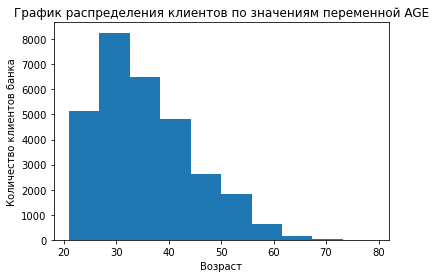

In [12]:
#Задание 5: Постройте график распределения клиентов по значениям переменной AGE. 
#Клиенты каких возрастов чаще всего приходят за кредитом в этот банк? 
#Ответ: исходя из гистограммы, можно сделать вывод о том, что клиенты в возрасте 25-35 лет чаще всего приходят за кредитом в этот банк.
import matplotlib.pyplot as plt
p = data["AGE"].plot(kind="hist").set_title('График распределения клиентов по значениям переменной AGE')
p = plt.ylabel("Количество клиентов банка")
p = plt.xlabel("Возраст")

6636
23364


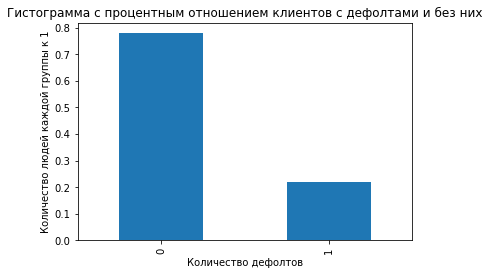

In [16]:
#Задание 6: Выведите общее количество клиентов с дефолтом и без него. 
#Постройте гистограмму с процентным отношением этих групп. 
#Как можно оценить, велика ли полученная доля клиентов с дефолтом?
#Ответ:исходя из построенной гистограммы, можно оценить, что полученная доля клиентов с дефолтом велика.
import matplotlib.pyplot as plt
default = (data['default.payment.next.month'] == 1).sum()
netdefault = (data['default.payment.next.month'] == 0).sum()
q = default + netdefault
print(default)
print(netdefault)
z = data['default.payment.next.month'].value_counts(normalize=True).plot(kind='bar', legend=False).set_title('Гистограмма с процентным отношением клиентов с дефолтами и без них')
z = plt.ylabel("Количество людей каждой группы к 1")
z = plt.xlabel("Количество дефолтов")
